## ROI Extraction

In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import copy
%matplotlib inline

In [136]:
im_reg = cv2.imread('D:\\ShachiLab\\Mukul\\Registration_matlab\\results\\registered\\rad_625_04_iter_500_time_4294.tif')
im_ir =  cv2.imread('D:\\ShachiLab\\Mukul\\Registration_matlab\\results\\registered\\fixed_resized.png')

In [172]:
cnt_pos = np.where(im_reg[:,:,2] == 255)
print(cnt_pos)

(array([1393, 1393, 1393, ..., 5149, 5149, 5149], dtype=int64), array([1810, 1811, 1812, ..., 3624, 3625, 3626], dtype=int64))


In [173]:
im_scr = im_reg[cnt_pos[0], cnt_pos[1]]
print(im_scr)

[[  0   0 255]
 [  0   0 255]
 [  0   0 255]
 ...
 [  0   0 255]
 [  0   0 255]
 [  0   0 255]]


In [135]:
im_ir_not = cv2.bitwise_not(im_ir)
f_n = os.path.join(direct, 'im_ir_not.png')
cv2.imwrite(f_n, im_ir_not)

True

In [139]:
temp_list = []
for a, b in zip(cnt_pos[0], cnt_pos[1]):
    temp_list.append([a, b])

In [140]:
xs, ys = zip(*temp_list)

In [141]:
im2 = copy.deepcopy(im_ir_not)
im2[xs,ys] = [0,0,255]

In [143]:
direct = "D:\\ShachiLab\\Mukul\\Registration_matlab\\results\\registered" 

In [144]:
filename = os.path.join(direct, "transfered_bb_ir.png")
cv2.imwrite(filename, im2)

True

In [147]:
im3 = copy.deepcopy(im_ir)

In [148]:
im3[xs, ys] = [0, 0, 255]

In [149]:
filename = os.path.join(direct, "transfered_bb_ir.png")
cv2.imwrite(filename, im3)

True

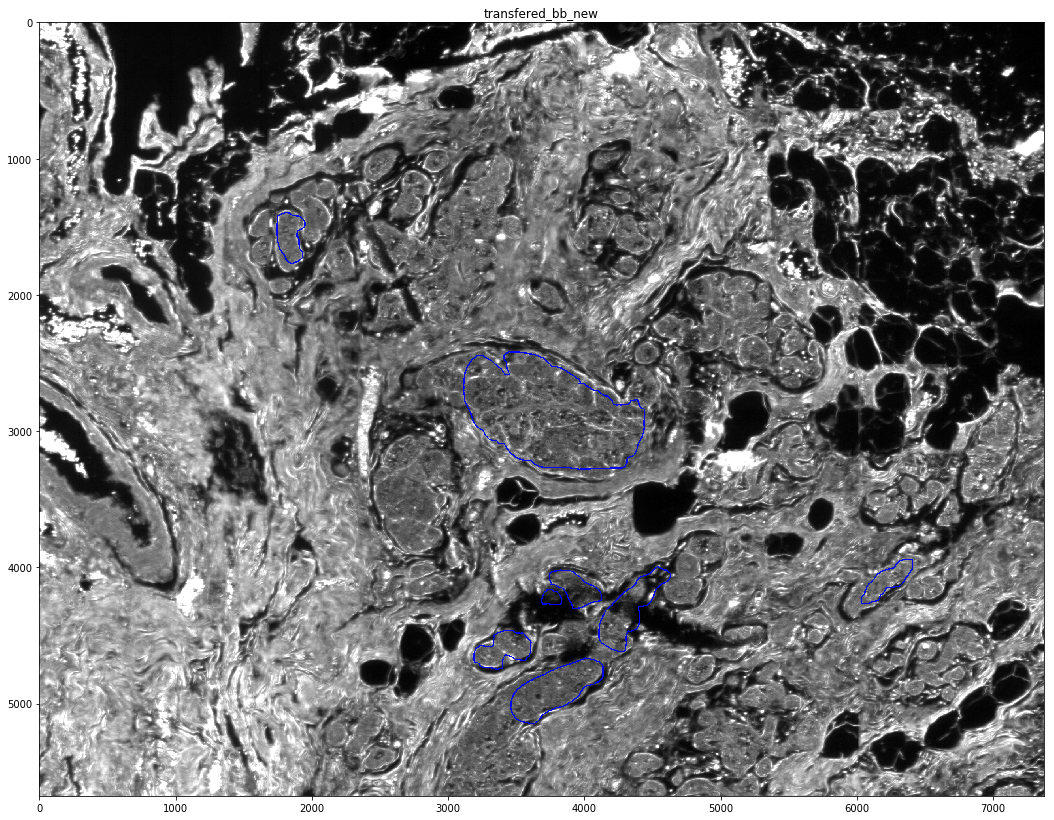

In [150]:
plt.figure(figsize = (18,18))
plt.title('transfered_bb_new')
plt.imshow(im3, cmap = 'gray')
plt.show()

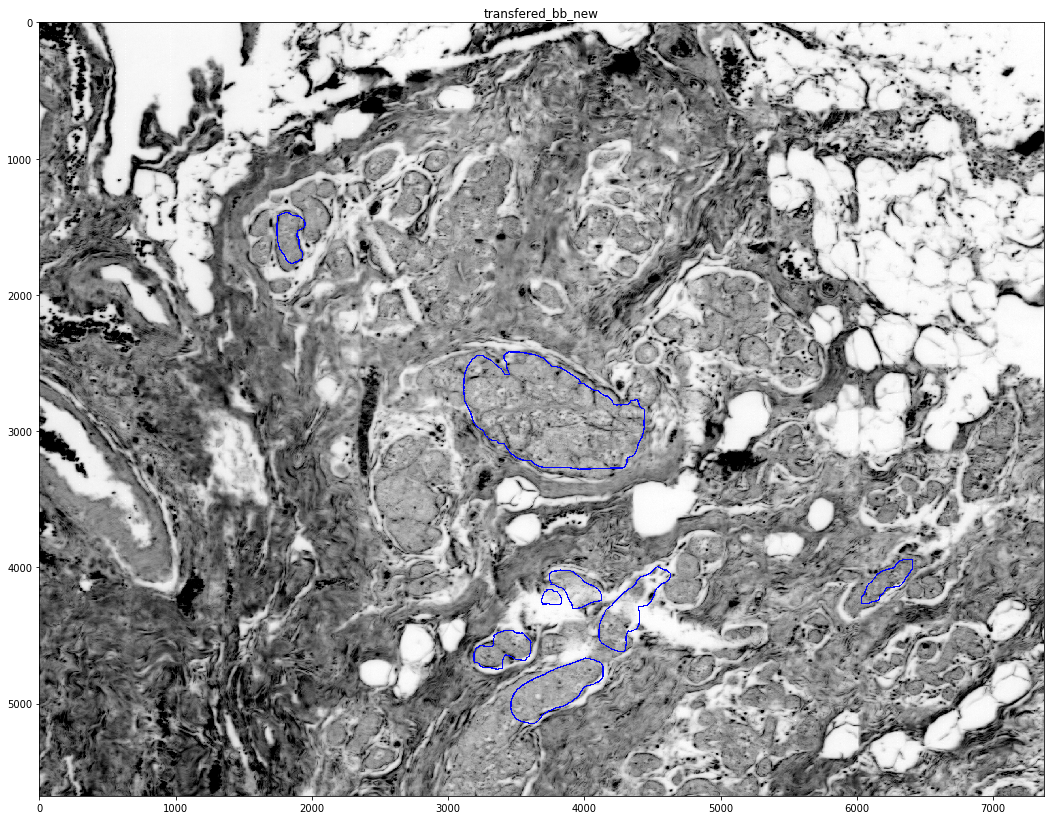

In [146]:
plt.figure(figsize = (18,18))
plt.title('transfered_bb_new')
plt.imshow(im2, cmap = 'gray')
plt.show()

In [40]:
I_unmarked = cv2.imread('D:\\ShachiLab\\Mukul\\Registration_matlab\\results\\registered\\rad_625_04_iter_500_time_4294_copy.tif')

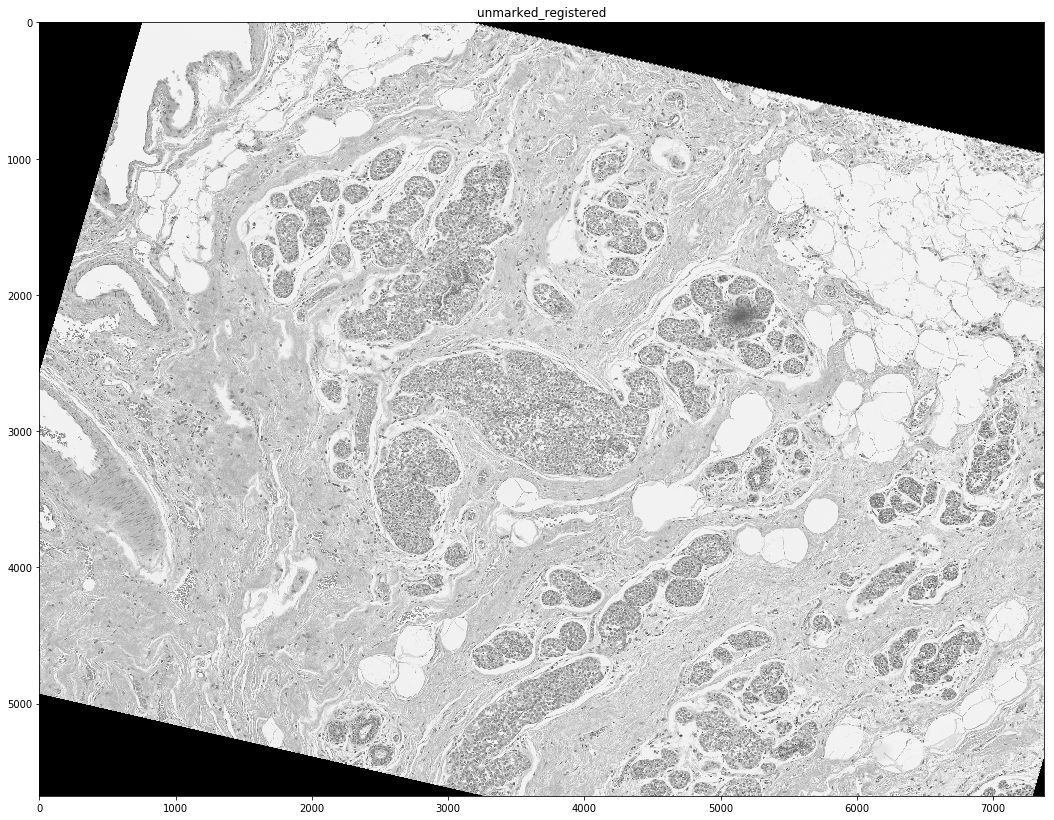

In [151]:
plt.figure(figsize = (18,18))
plt.title('unmarked_registered')
plt.imshow(I_unmarked, cmap = 'gray')
plt.show()

## Mask Generation for Template Image

In [152]:
im_reg_gray = cv2.cvtColor(im_reg, cv2.COLOR_BGR2GRAY)

In [153]:
mask = np.zeros_like(im_reg_gray)

In [154]:
mask.shape

(5677, 7372)

In [155]:
mask.sum()

0

In [156]:
np.array(temp_list).reshape((-1,1,2)).shape

(118436, 1, 2)

In [157]:
ctr = np.array(temp_list).reshape((-1,1,2)).astype(np.int32)

In [158]:
mask[xs,ys] = 255

In [160]:
np.sum(mask)/118436

255.0

In [161]:
filename1 = os.path.join(direct, "mask1.png")
filename2 = os.path.join(direct, "cropped.png")
filename3 = os.path.join(direct, "masked.png")
filename4 = os.path.join(direct, "masked1.png")

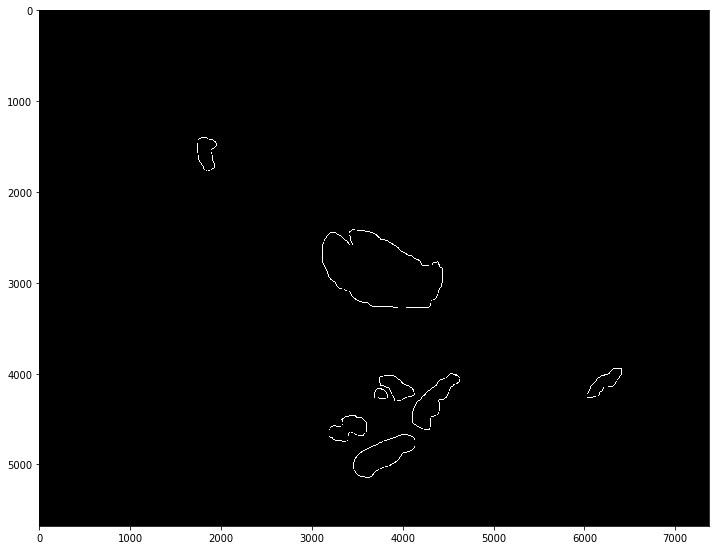

In [162]:
cv2.imwrite(filename1,mask)
plt.figure(figsize = (12,12))
plt.imshow(mask, cmap = 'gray')
plt.show()

In [174]:
temp_list1 = []
for a, b in zip(cnt_pos[0], cnt_pos[1]):
    temp_list1.append([b, a])

In [175]:
ctr1 = np.array(temp_list1).reshape((-1,1,2)).astype(np.int32)

In [184]:
mask1 = copy.deepcopy(mask)

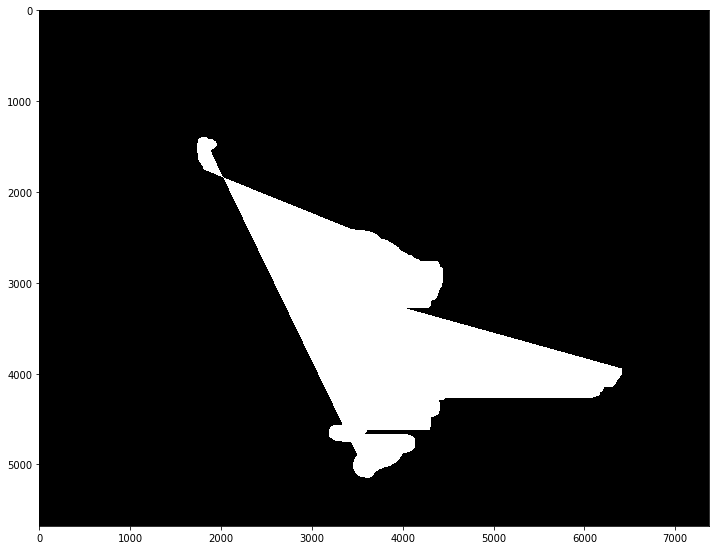

In [187]:
cv2.fillConvexPoly(mask1, ctr1, 255)
plt.figure(figsize = (12,12))
plt.imshow(mask1, cmap = 'gray')
plt.show()

In [52]:
fn = os.path.join(direct, "mask_for_template_img.png")
cv2.imwrite(fn, mask)

True

## Template Image Generation

In [34]:
out = np.zeros_like(im_reg_gray)
out[mask == 255] = im_reg_gray[mask == 255]
#out contains bounding box mark as well so it should not be considered as template image

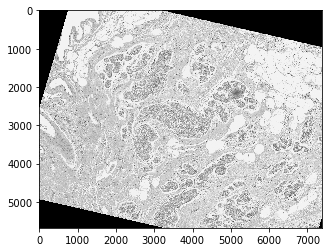

In [45]:
plt.imshow(I_unmarked[:,:,0], cmap = 'gray')
plt.show()

In [46]:
out2 = np.zeros_like(I_unmarked)
out2[mask == 255] = I_unmarked[mask == 255]

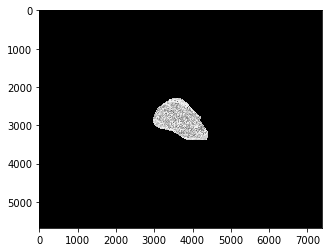

In [47]:
plt.figure()
plt.imshow(out2, cmap = 'gray')
plt.show()

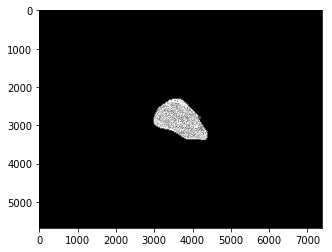

In [35]:
#cv2.imwrite(filename1,out)
plt.figure()
plt.imshow(out, cmap = 'gray')
plt.show()

In [48]:
(topy, topx) = (np.min(ys), np.min(xs))
(bottomy, bottomx) = (np.max(ys), np.max(xs))
out3 = out2[topx:bottomx+1, topy:bottomy+1,:]

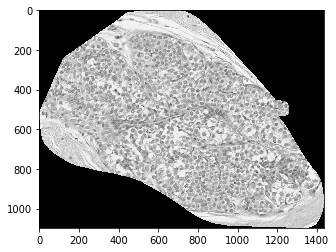

In [49]:
plt.imshow(out3, cmap = 'gray')
plt.show()

In [50]:
filename1 = os.path.join(direct, "masked_reg_final_template.png")
filename2 = os.path.join(direct, "masked_ir_final_source.png")
filename3 = os.path.join(direct, "masked.png")
filename4 = os.path.join(direct, "masked1.png")

In [51]:
cv2.imwrite(filename1,out3)

True

## Source Image Generation

In [53]:
# change the size of bounding box i.e consider larger bounding box for source image
topx_ir = topx-200
topy_ir = topy - 200
bottomx_ir = bottomx + 200
bottomy_ir = bottomy + 200

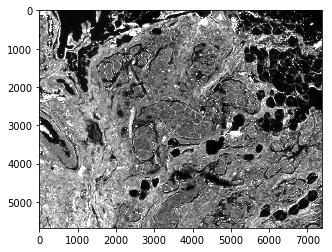

In [54]:
source_image =  copy.deepcopy(im_ir)
plt.imshow(source_image, cmap = 'gray')
plt.show()

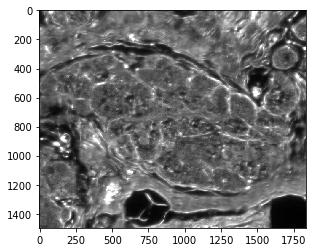

In [55]:
source_image_final = source_image[topx_ir:bottomx_ir+1, topy_ir:bottomy_ir+1]
plt.imshow(source_image_final, cmap = 'gray')
plt.show()

## Preprocessing for template and Source Image
out3 is the template image and source_image_final is the source which we are considering for template matching 

In [56]:
T = copy.deepcopy(out3)

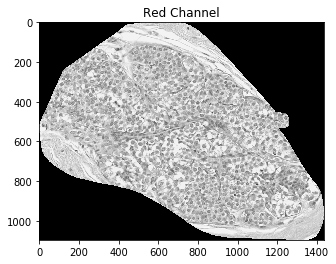

In [62]:
plt.title('Red Channel')
plt.imshow(T[:,:,2], cmap = 'gray')

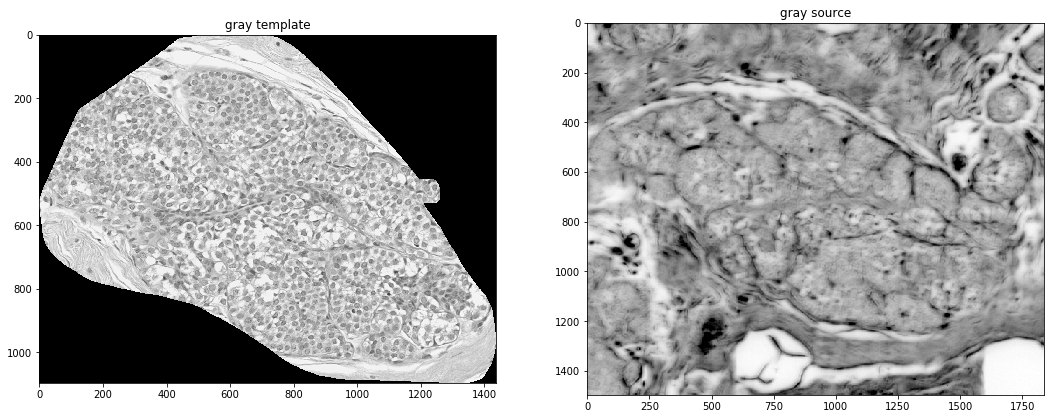

In [130]:
#subplot(nrows, ncols, index, **kwargs)
T1 = cv2.cvtColor(T, cv2.COLOR_BGR2GRAY)
#T2 = cv2.bitwise_not(T1)
s_not = cv2.bitwise_not(source_image_final)
plt.figure(figsize = (18,18))
plt.subplot(121)
plt.title('gray template')
plt.imshow(T1, cmap = 'gray')
plt.subplot(122)
plt.title('gray source')
plt.imshow(s_not, cmap = 'gray')

In [131]:
S = copy.deepcopy(s_not)

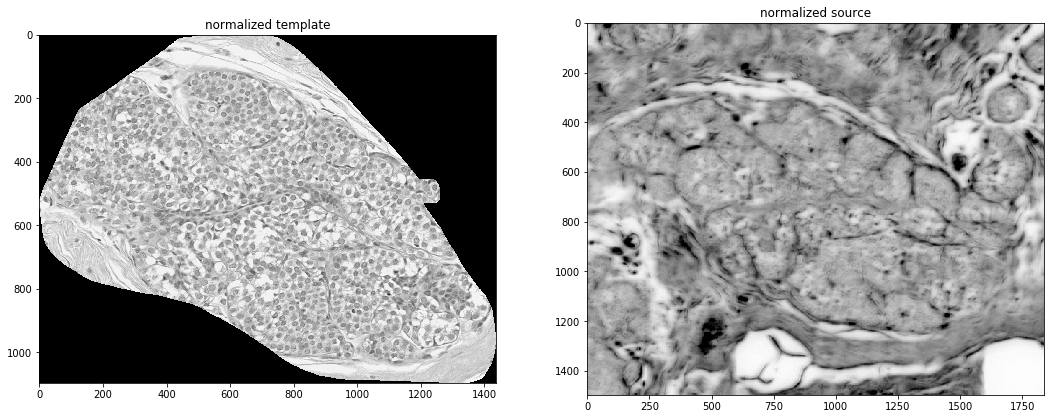

In [132]:
T2 = ( T1 - np.min(T1))/(np.max(T1) - np.min(T1))
S1 = (S - np.min(S))/(np.max(S) - np.min(S))
plt.figure(figsize = (18,18))
plt.subplot(121)
plt.title('normalized template')
plt.imshow(T2, cmap = 'gray')
plt.subplot(122)
plt.title('normalized source')
plt.imshow(S1, cmap = 'gray')

In [99]:
def auto_canny(image, sigma=0.33):
    # compute the median of the single channel pixel intensities
    v = np.median(image)
    # apply automatic Canny edge detection using the computed median
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv2.Canny(image, lower, upper)
    # return the edged image
    return edged

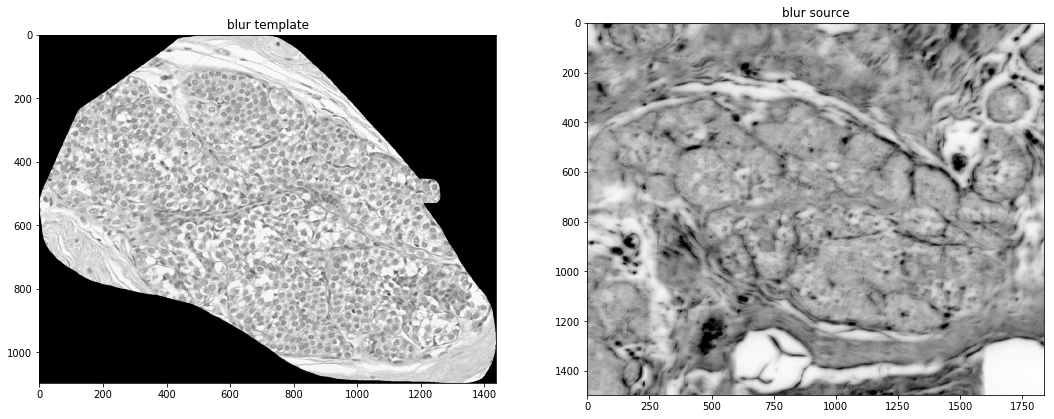

In [133]:
T3 = cv2.GaussianBlur(T2, (5,5), 0)
S2 = cv2.GaussianBlur(S1, (5,5), 0)
plt.figure(figsize = (18,18))
plt.subplot(121)
plt.title('blur template')
plt.imshow(T3, cmap = 'gray')
plt.subplot(122)
plt.title('blur source')
plt.imshow(S2, cmap = 'gray')

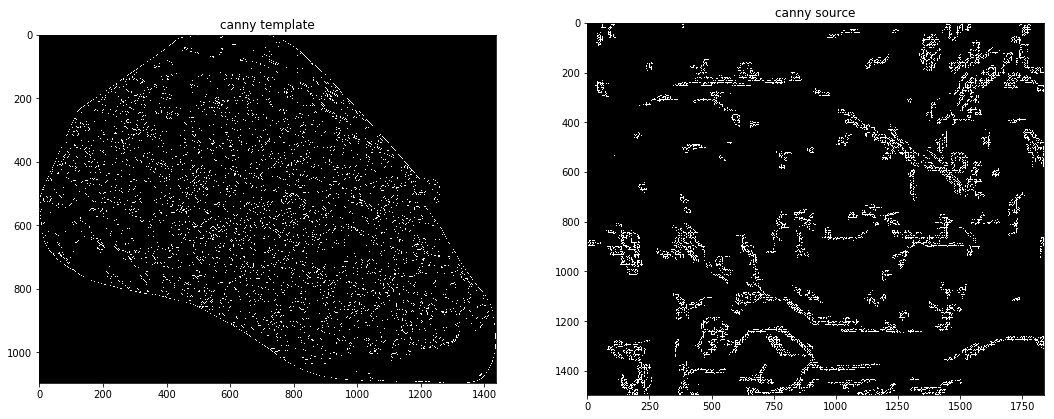

In [134]:
T4 = cv2.Canny(T1, 225, 255)
S3 = cv2.Canny(S, 40, 255)
plt.figure(figsize = (18,18))
plt.subplot(121)
plt.title('canny template')
plt.imshow(T4, cmap = 'gray')
plt.subplot(122)
plt.title('canny source')
plt.imshow(S3, cmap = 'gray')

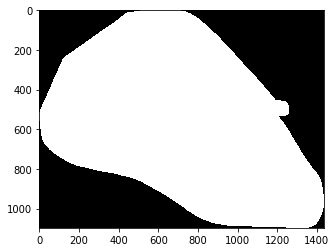

In [42]:
mask_cropped = mask[topx:bottomx+1, topy:bottomy+1]
plt.imshow(mask_cropped, cmap = 'gray')
plt.show()

In [47]:
out.shape
out_gray = cv2.cvtColor(out, cv2.COLOR_BGR2GRAY)
out_gray.shape

(1097, 1437)

In [48]:
mask_cropped.shape

(1097, 1437)

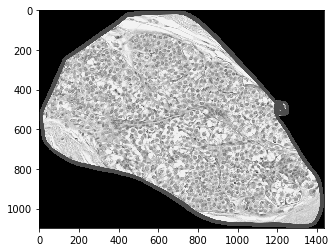

In [49]:
masked = cv2.bitwise_and(mask_cropped,out_gray)
#cv2.imwrite(filename4,masked)
plt.imshow(masked, cmap = 'gray')
plt.show()

In [50]:
masked.shape

(1097, 1437)

In [51]:
im_ir.shape

(5677, 7372, 3)

### Template Matching

In [52]:
source_image =  copy.deepcopy(im_ir)

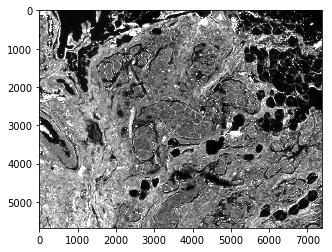

In [53]:
plt.imshow(source_image)
plt.show()

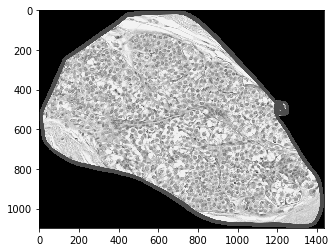

In [54]:
template_image = copy.deepcopy(masked)
plt.imshow(template_image, cmap = 'gray')
plt.show()

In [55]:
print(template_image.shape, source_image.shape)

(1097, 1437) (5677, 7372, 3)


In [56]:
w, h = template_image.shape
template = template_image
img2 = cv2.cvtColor(source_image, cv2.COLOR_BGR2GRAY)

In [85]:
dir_name = 'D:\\ShachiLab\\Mukul\\Registration_matlab\\results\\registered\\post_process'

In [136]:
temp_list2 = []
for a, b in zip(cnt_pos[0], cnt_pos[1]):
    temp_list2.append((b, a))

In [147]:
ctr2 = scale_polygon(temp_list2, 200) # not working correctly

In [150]:
ctr3 = np.array(ctr2).reshape((-1,1,2)).astype(np.int32)
print(ctr3.shape)

(84190, 1, 2)


In [151]:
print(ctr1.shape)

(84190, 1, 2)


In [72]:
(topy, topx) = (np.min(ys), np.min(xs))
(bottomy, bottomx) = (np.max(ys), np.max(xs))
#out = im_reg[topx:bottomx+1, topy:bottomy+1]

In [73]:
topx -= 200
topy -= 200
bottomx += 200
bottomy += 200

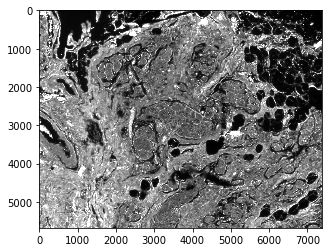

In [74]:
plt.figure()
plt.imshow(img2, cmap = 'gray')
plt.show()

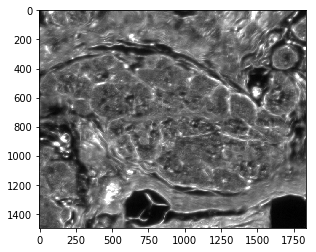

In [75]:
new_source = img2[topx:bottomx+1, topy:bottomy+1]
plt.imshow(new_source, cmap = 'gray')
plt.show()

In [68]:
dir_name = 'D:\\ShachiLab\\Mukul\\Registration_matlab\\results\\registered\\post_process'

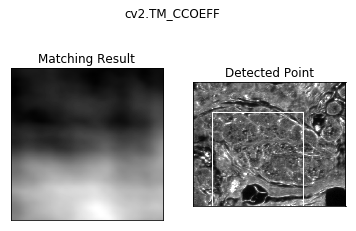

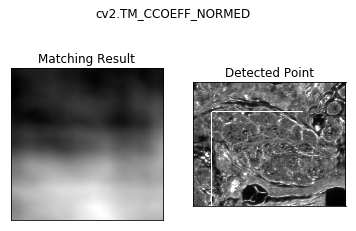

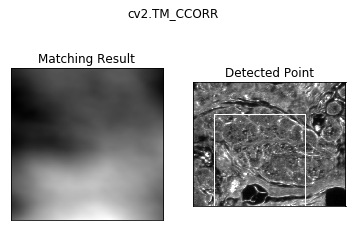

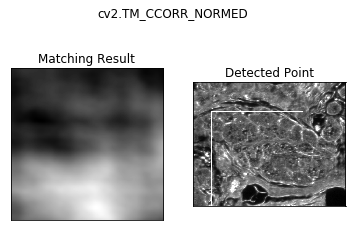

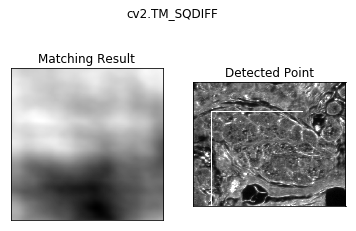

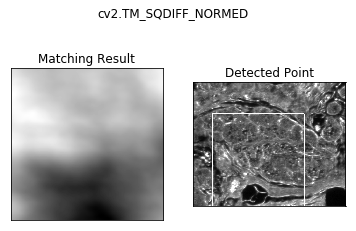

In [76]:
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
idx = 12
w, h = template.shape
for meth in methods:
    img = new_source.copy()
    method = eval(meth)

    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv2.rectangle(img,top_left, bottom_right, (255,255,255), 10)
    file_name = os.path.join(dir_name, str(idx) + ".png")
    idx += 1
    cv2.imwrite(file_name, img)

    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)

    plt.show()

In [111]:
import itertools as IT

In [146]:
def scale_polygon(path,offset):
    center = centroid_of_polygon(path)
    path1 = []
    for i in path:
        i = list(i)
        if i[0] > center[0]:
            i[0] += offset
        else:
            i[0] -= offset
        if i[1] > center[1]: 
            i[1] += offset
        else:
            i[1] -= offset
            
        path1.append((i[0],i[1]))
                     
    return path1


def area_of_polygon(x, y):
    """Calculates the signed area of an arbitrary polygon given its verticies
    http://stackoverflow.com/a/4682656/190597 (Joe Kington)
    http://softsurfer.com/Archive/algorithm_0101/algorithm_0101.htm#2D%20Polygons
    """
    area = 0.0
    for i in range(-1, len(x) - 1):
        area += x[i] * (y[i + 1] - y[i - 1])
    return area / 2.0

def centroid_of_polygon(points):
    """
    http://stackoverflow.com/a/14115494/190597 (mgamba)
    """
    area = area_of_polygon(*zip(*points))
    result_x = 0
    result_y = 0
    N = len(points)
    points = IT.cycle(points)
    x1, y1 = next(points)
    for i in range(N):
        x0, y0 = x1, y1
        x1, y1 = next(points)
        cross = (x0 * y1) - (x1 * y0)
        result_x += (x0 + x1) * cross
        result_y += (y0 + y1) * cross
    result_x /= (area * 6.0)
    result_y /= (area * 6.0)
    return (result_x, result_y)

In [105]:
ctr1

array([[[3495, 2301]],

       [[3496, 2301]],

       [[3497, 2301]],

       ...,

       [[4307, 3397]],

       [[4308, 3397]],

       [[4309, 3397]]])

In [106]:
ctr2

array([[[6990, 4602]],

       [[6992, 4602]],

       [[6994, 4602]],

       ...,

       [[8614, 6794]],

       [[8616, 6794]],

       [[8618, 6794]]])

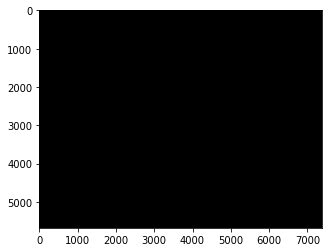

In [154]:
mask_source = np.zeros_like(im_reg_gray)
plt.imshow(mask_source, cmap = 'gray')
plt.show()

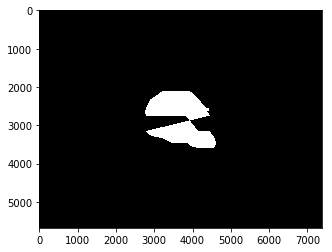

In [155]:
cv2.fillConvexPoly(mask_source, ctr3, 255)
plt.figure()
plt.imshow(mask_source, cmap = 'gray')
plt.show()

In [99]:
(y_new, x_new) = np.where(mask_source == 255)
(topy, topx) = (np.min(y_new), np.min(x_new))
(bottomy, bottomx) = (np.max(y_new), np.max(x_new))
mask_out = mask_source[topy:bottomy+1, topx:bottomx+1]

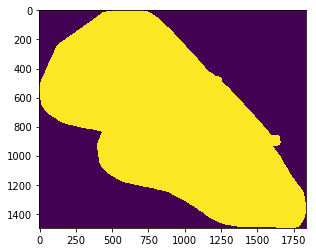

In [100]:
plt.figure()
plt.imshow(mask_out)
plt.show()

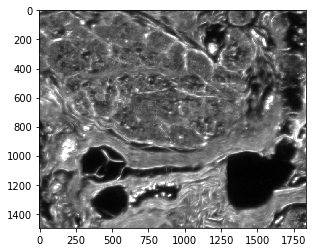

In [103]:
ir_masked = img2[topy:bottomy+1, topx:bottomx+1]
ir_masked_plt = cv2.cvtColor(ir_masked, cv2.COLOR_BGR2RGB)
fn = os.path.join(direct, "ir_masked.png")
cv2.imwrite(fn, ir_masked)
plt.figure()
plt.imshow(ir_masked_plt)
plt.show()

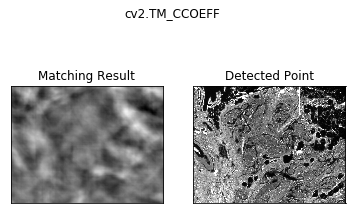

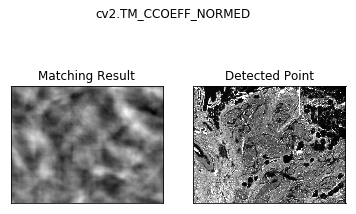

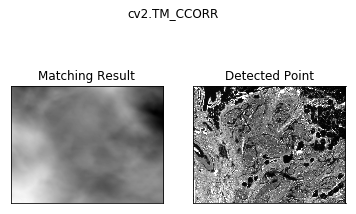

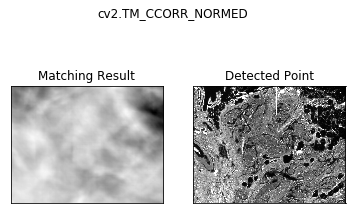

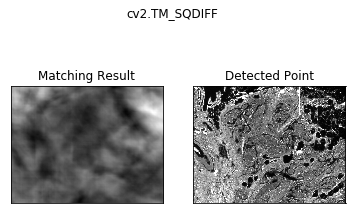

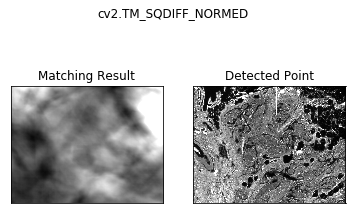

In [54]:
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
idx = 0

for meth in methods:
    img = img2.copy()
    method = eval(meth)

    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv2.rectangle(img,top_left, bottom_right, (255,255,255), 10)
    file_name = os.path.join(dir_name, str(idx) + ".png")
    idx += 1
    cv2.imwrite(file_name, img)

    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)

    plt.show()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [78]:
# escape character, '\t', '\n', '\r', \a ,  \b, \f, \v and '\\'.

im = cv2.imread('D:\\ShachiLab\\Mukul\\Registration_matlab\\results\\registered\\rad_625_04_iter_500_time_4294.tif')

In [79]:
im.shape

(5677, 7372, 3)

In [66]:
gray = im[:,:,2]
gray1 = cv2.resize(gray, (1000,500))

In [80]:
np.max(im[:,:,2])

255

In [109]:
a = np.where(im[:,:,2] == 255)

In [113]:
b = [a[0],a[1]]

In [115]:
c = np.array(b)

In [116]:
c.shape

(2, 84190)

In [98]:
b = np.where(im[:,:,2] == 255)[0]

In [99]:
b.shape

(84190,)

In [105]:
b.size

84190

In [118]:
a[0].size

84190

In [48]:
im_r = im[:,:,1]
re = cv2.resize(im_r , (1000,500))

In [49]:
cv2.imshow('im',re)
cv2.waitKey(0)

-1

In [220]:
gray1 = copy.deepcopy(im2)

In [225]:
gray2 = cv2.cvtColor(gray1, cv2.COLOR_BGR2GRAY)

In [226]:
np.sum(gray2 == np.max(gray2))

61809

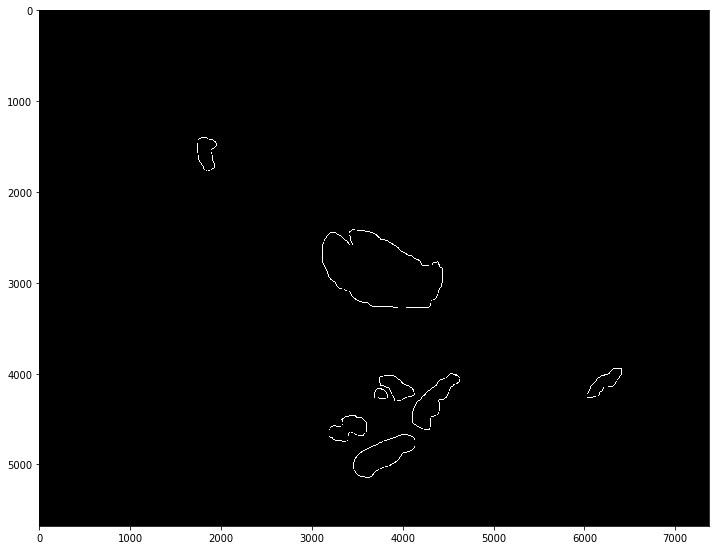

In [251]:
ret,thresh1 = cv2.threshold(gray1[:,:,2],254,255,cv2.THRESH_BINARY)
plt.figure(figsize = (12,12))
cv2.imwrite(direct + "\\abc.png", thresh1)
plt.imshow(mask, cmap = 'gray')

In [261]:
contours, hierarchy = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

In [262]:
cntrs = np.array(contours)

In [264]:
a= [np.sum(cntrs[i]) for i in range(8)]

In [265]:
cntrs

array([array([[[4004, 4661]],

       [[4003, 4662]],

       [[4002, 4663]],

       ...,

       [[4007, 4661]],

       [[4006, 4661]],

       [[4005, 4661]]], dtype=int32),
       array([[[3450, 4456]],

       [[3449, 4457]],

       [[3448, 4457]],

       ...,

       [[3453, 4456]],

       [[3452, 4456]],

       [[3451, 4456]]], dtype=int32),
       array([[[3747, 4156]],

       [[3746, 4157]],

       [[3745, 4157]],

       [[3744, 4157]],

       [[3743, 4157]],

       [[3742, 4158]],

       [[3741, 4158]],

       [[3740, 4158]],

       [[3739, 4158]],

       [[3738, 4159]],

       [[3737, 4159]],

       [[3736, 4159]],

       [[3735, 4159]],

       [[3734, 4160]],

       [[3733, 4160]],

       [[3732, 4160]],

       [[3731, 4161]],

       [[3730, 4161]],

       [[3729, 4161]],

       [[3728, 4161]],

       [[3727, 4161]],

       [[3726, 4161]],

       [[3725, 4161]],

       [[3724, 4161]],

       [[3723, 4161]],

       [[3722, 4161]],

       [[3721

In [266]:
direct = "D:\\ShachiLab\\Mukul\\Registration_matlab\\results\\registered\\post_process\\roi_test" 

In [267]:
mask3 = np.zeros_like(mask)

In [268]:
idx = 16
for cnt in contours:
    #roi = gray2[y:y+h, x:x+w]
    cv2.drawContours(mask3, cnt, -1, (255,255,255),15)
    filename = os.path.join(direct, str(idx) + ".png")
    cv2.imwrite(filename, mask3)
    idx += 1

In [260]:
idx = 16
for cnt in contours:
    mask4 = np.zeros_like(mask)
    cv2.fillConvexPoly(mask4, cnt, 255)
    #cv2.drawContours(mask4, cnt, -1, (255,255,255),15)
    filename = os.path.join(direct, str(idx) + ".png")
    cv2.imwrite(filename, mask4)
    idx += 1

In [56]:
from PIL import Image

In [101]:
im2 =  cv2.imread('D:\\ShachiLab\\Mukul\\Registration_matlab\\results\\registered\\fixed_resized.png')

In [102]:
cimg = np.zeros_like(im2)

In [103]:
cimg.shape

(5677, 7372, 3)

In [ ]:
import math
import matplotlib.path
import numpy as np

x_pixel_nos = a[0]
y_pixel_nos = a[1] 

temp_list = []
for a, b in zip(x_pixel_nos, y_pixel_nos):
    temp_list.append([a, b])

polygon = np.array(temp_list)
left = np.min(polygon, axis=0)
right = np.max(polygon, axis=0)
x = np.arange(math.ceil(left[0]), math.floor(right[0])+1)
y = np.arange(math.ceil(left[1]), math.floor(right[1])+1)
xv, yv = np.meshgrid(x, y, indexing='xy')
points = np.hstack((xv.reshape((-1,1)), yv.reshape((-1,1))))

path = matplotlib.path.Path(polygon)
mask = path.contains_points(points)
mask.shape = xv.shape

(array([2301, 2301, 2301, ..., 3397, 3397, 3397], dtype=int64), array([3495, 3496, 3497, ..., 4307, 4308, 4309], dtype=int64))


[[  0   0 255]
 [  0   0 255]
 [  0   0 255]
 ...
 [  0   0 255]
 [  0   0 255]
 [  0   0 255]]


In [7]:
cord

array([[2301, 2301, 2301, ..., 3397, 3397, 3397],
       [3495, 3496, 3497, ..., 4307, 4308, 4309]], dtype=int64)

In [15]:
im2 = im_ir

In [17]:
im2[xs,ys] = [0,0,255]

True

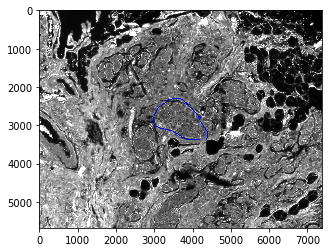

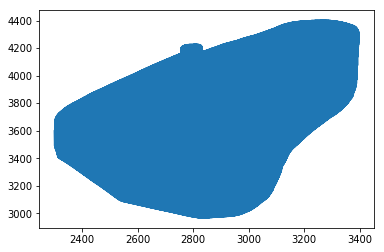

In [12]:
plt.plot(cnt_pos[0], cnt_pos[1])
plt.show()

In [27]:
cnt_pos1 = np.argwhere(im_reg[:,:,2] == 255)

In [28]:
cnt_pos1

array([[2301, 3495],
       [2301, 3496],
       [2301, 3497],
       ...,
       [3397, 4307],
       [3397, 4308],
       [3397, 4309]], dtype=int64)

In [31]:
cnt_pos

(array([2301, 2301, 2301, ..., 3397, 3397, 3397], dtype=int64),
 array([3495, 3496, 3497, ..., 4307, 4308, 4309], dtype=int64))

In [10]:
ret, threshed_img = cv2.threshold(cv2.cvtColor(im, cv2.COLOR_BGR2GRAY),
                127, 255, cv2.THRESH_BINARY)

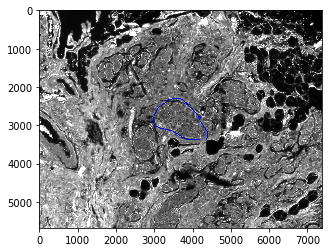

In [79]:
im = copy.deepcopy(im2)
gray=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
plt.imshow(im, cmap = 'gray')
plt.show()

In [91]:
im[mask == 255] = [255,255,255]

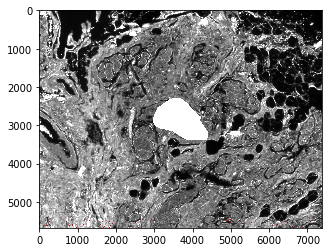

In [92]:
plt.imshow(im, cmap = 'gray')
plt.show()

In [93]:
gray=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)

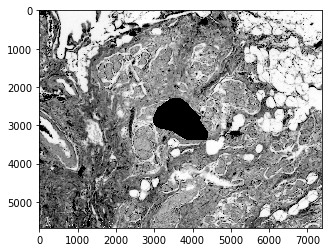

In [94]:
gray_not = cv2.bitwise_not(gray)
plt.imshow(gray_not, cmap = 'gray')
plt.show()

In [95]:
contours, hierarchy = cv2.findContours(gray_not,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)[-2:]

In [96]:
dir_name1 = "E:\\Mukul\\funny"

In [97]:
cont = contours[0]

In [98]:
len(contours)

3380

In [99]:
idx =0 
for cnt in contours:
    idx += 1
    x,y,w,h = cv2.boundingRect(cnt)
    filename = os.path.join(dir_name1, str(idx) + '.jpg')
    roi = im[y:y+h, x:x+w]
    cv2.imwrite(filename, roi)
    cv2.rectangle(im,(x,y),(x+w,y+h),(200,0,0),2)

KeyboardInterrupt: 

In [5]:
cv2.imshow('img',im)
cv2.waitKey(0)  

-1